# **LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
# Use the Regression class defined in the previous lab

class Regression:
	# Constructor
	def __init__(self, name='reg'):
		self.name = name  # Create an instance variable

	def grad_update(self,w_old,lr,y,x):
		w = w_old + 2 * lr / y.shape[0] * (x @ (y - x.T @ w_old))
		return w

	def error(self,w,y,x):
		return np.mean((y - x.T @ w)**2)

	def mat_inv(self,y,x_aug):
		return np.linalg.inv(x_aug @ x_aug.T) @ x_aug @ y
	
	# By Gradien descent

	def grad_descent(self,x,y,lr):
		err = []
		w_pred = np.random.uniform(-1, 1, (x.shape[0]))

		for i in range(int(1e+20)):
			w_pred = self.grad_update(w_pred,lr,y,x)
			err.append(self.error(w_pred,y,x))
			if i > 1:
				dev = np.abs(err[-2] - err[-1])
			else:
				dev = 1
			if dev<=0.000001:
				break

		return w_pred, err

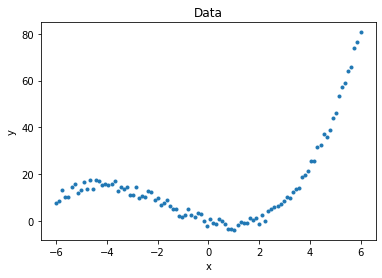

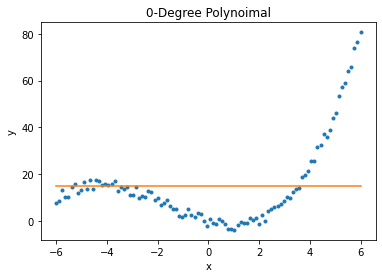

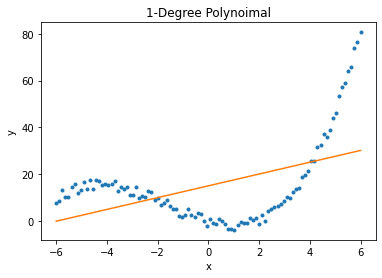

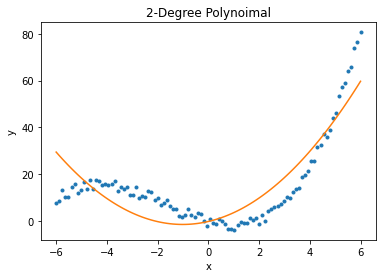

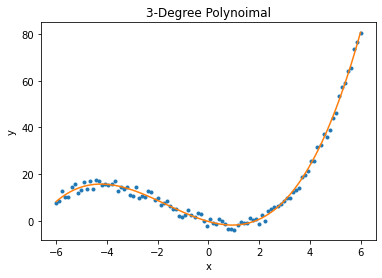

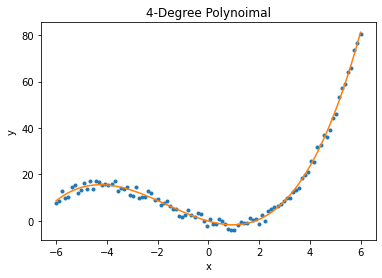

In [3]:
# Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]

# Define Weights as per the given equation
w = np.array([-3, -3, 1.25, 0.25]).T			# w = [w0, w1, ..., wm]^T mx1

## Function to transform the data into polynomial

def data_transform(X,degree): 
	# X = [x1, x2, ..., xn] 1xn
	X_new = np.array([np.squeeze(X)**i for i in range(degree+1)])

	# X_new = [[x0^0, x1^0, ..., xn^0], [x0^1, x1^1, ..., xn^1], ..., [x0^m, x1^m, ..., xn^m]] mxn

	return X_new


X = data_transform(x,3)

y = X.T @ w 		# nx1

y = y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

reg=Regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

def polyComputationFit(x,y,degree):
	X_1 = data_transform(x,degree)
	w_mat=reg.mat_inv(y,X_1)
	y_pred=X_1.T @ w_mat
	plt.figure()
	plt.plot(x.T,y,'.')
	plt.plot(x.T,y_pred)
	plt.title(str(degree)+'-Degree Polynoimal')
	plt.xlabel('x')
	plt.ylabel('y')
	plt.show()

# Write the code for degree 1 polynomial fitting
polyComputationFit(x,y,1)

# Write the code for degree 2 polynomial fitting
polyComputationFit(x,y,2)

# Write the code for degree 3 polynomial fitting
polyComputationFit(x,y,3)

# Write the code for degree 4 polynomial fitting
polyComputationFit(x,y,4)


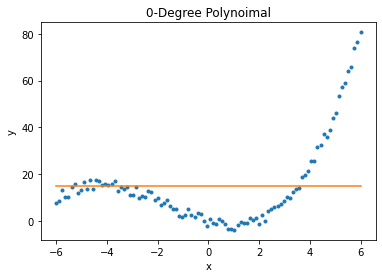

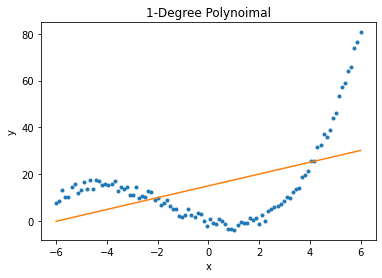

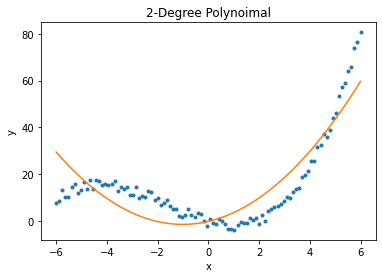

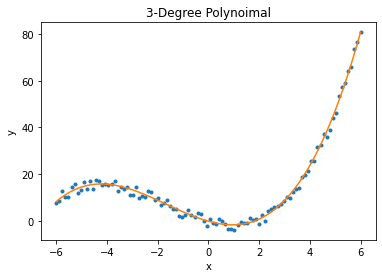

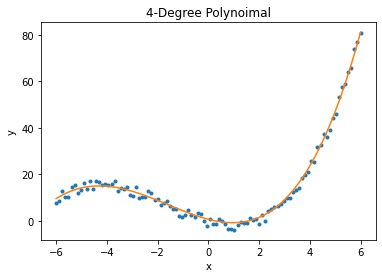

In [4]:
# By Gradient Descent

def polyGradientFit(x, y, degree, lr):
	X_1 = data_transform(x, degree)
	w_pred, err = reg.grad_descent(X_1, y, lr)
	y_pred=X_1.T @ w_pred
	plt.figure()
	plt.plot(x.T,y,'.')
	plt.plot(x.T,y_pred)
	plt.title(str(degree)+'-Degree Polynoimal')
	plt.xlabel('x')
	plt.ylabel('y')
	plt.show()

# Write the code for degree 0 polynomial fitting
polyGradientFit(x,y,0,1e-3)

# Write the code for degree 1 polynomial fitting
polyGradientFit(x,y,1,1e-3)

# Write the code for degree 2 polynomial fitting
polyGradientFit(x,y,2,1e-3)

# Write the code for degree 3 polynomial fitting
polyGradientFit(x,y,3,1e-4)

# Write the code for degree 4 polynomial fitting
polyGradientFit(x,y,4,1e-6)

# Linear Regression

  Generate the data as shown in the figure below


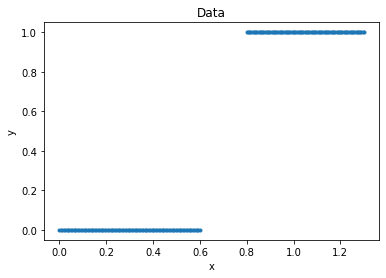

In [5]:
x1 = np.linspace(0, 0.6, 100)
x2 = np.linspace(0.8, 1.3, 100)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(100), np.ones(100)))

plt.plot(x, y, '.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [6]:
class Regression:
	# Constructor
	def __init__(self, name='reg'):
		self.name = name  # Create an instance variable

	def grad_update(self,w_old,lr,y,x):
		w = w_old + 2 * lr / y.shape[0] * (x @ (y - x.T @ w_old))
		return w

	def error(self,w,y,x):
		return np.mean((y - x.T @ w)**2)

	def mat_inv(self,y,x_aug):
		return np.linalg.inv(x_aug @ x_aug.T) @ x_aug @ y
	
	# By Gradien descent

	def grad_descent(self,x,y,lr):
		err = []
		w_pred = np.random.uniform(-1, 1, (x.shape[0]))

		for i in range(int(1e+10)):
			w_pred = self.grad_update(w_pred,lr,y,x)
			err.append(self.error(w_pred,y,x))
			if i > 1:
				dev = np.abs(err[-2] - err[-1])
			else:
				dev = 1
			if dev<=0.000001:
				break

		return w_pred, err

  Augment the Data and generate optimal weights

In [7]:
# Augment the data
_x = x[np.newaxis,:]
print(f"Shape of x: {_x.shape}")

x_aug = np.vstack((np.ones((1,_x.shape[1])), _x))
print(f"Shape of x_aug: {x_aug.shape}")

Shape of x: (1, 200)
Shape of x_aug: (2, 200)


Optimal weights: [-0.24220603  1.08598856]


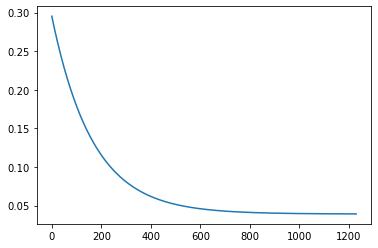

In [8]:
# Generate optimal weights using gradient descent
reg = Regression()
w_pred, err = reg.grad_descent(x_aug, y, 1e-3)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.show()

Using the optimal weights, fit the curve

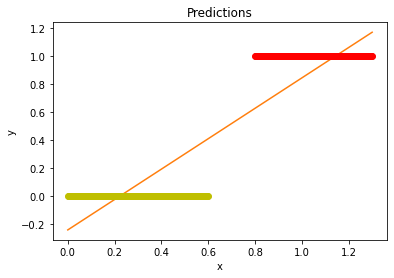

In [9]:
# Plot the data, predictions and the optimal line
plt.plot(x, y, '.')
y_pred = w_pred[0] + w_pred[1] * x
plt.plot(x,  y_pred, '-')
pred_zero = np.where(y_pred < 0.5)
pred_one = np.where(y_pred >= 0.5)
plt.plot(x[pred_zero], np.zeros(x[pred_zero].shape[0]), 'oy')
plt.plot(x[pred_one], np.ones(x[pred_one].shape[0]), 'or')
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

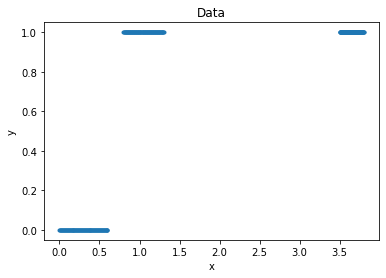

In [10]:
x1 = np.linspace(0, 0.6, 100)
x2 = np.linspace(0.8, 1.3, 100)
x3 = np.linspace(3.5, 3.8, 100)
x = np.concatenate((x1, x2, x3))
y = np.concatenate((np.zeros(100), np.ones(100), np.ones(100)))

plt.plot(x, y, '.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Shape of x: (1, 300)
Shape of x_aug: (2, 300)
Optimal weights: [0.34069199 0.20446734]


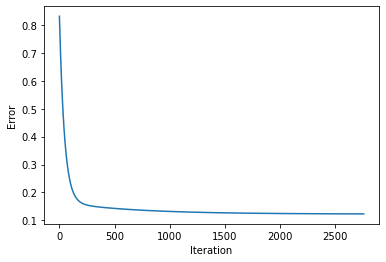

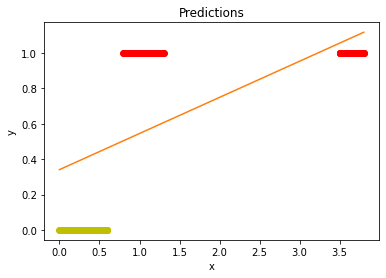

In [11]:
# Augment the data
_x = x[np.newaxis,:]
print(f"Shape of x: {_x.shape}")

x_aug = np.vstack((np.ones((1,_x.shape[1])), _x))
print(f"Shape of x_aug: {x_aug.shape}")

# Generate optimal weights using gradient descent
reg = Regression()
w_pred, err = reg.grad_descent(x_aug, y, 1e-3)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Plot the data and the optimal line
plt.plot(x, y, '.')
y_pred = w_pred[0] + w_pred[1] * x
plt.plot(x,  y_pred, '-')
pred_zero = np.where(y_pred < 0.5)
pred_one = np.where(y_pred >= 0.5)
plt.plot(x[pred_zero], np.zeros(x[pred_zero].shape[0]), 'oy')
plt.plot(x[pred_one], np.ones(x[pred_one].shape[0]), 'or')
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

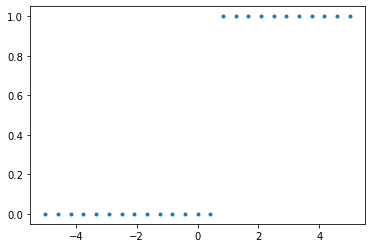

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [13]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):

	# Compute Mean square error and logistic loss using cost function
	y_pred = (1 + np.exp(-w0 - w1[i] * x))**(-1)
	cost_fn_mse.append(np.mean((y - y_pred)**2)/2)
	cost_fn_logis.append(-np.mean(y * np.log(y_pred+1e-20) + (1 - y) * np.log(1 - y_pred+1e-20)))

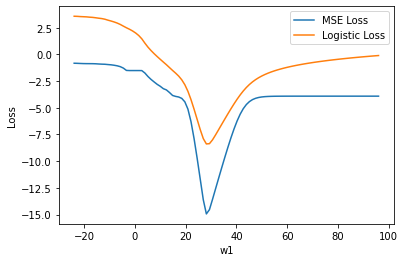

In [14]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()
plt.xlabel('w1')
plt.ylabel('Loss')
plt.show()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

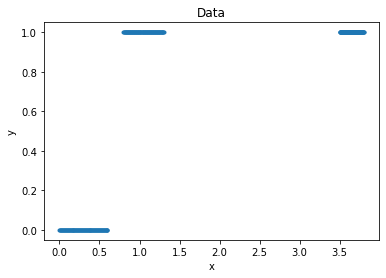

In [15]:
x1 = np.linspace(0, 0.6, 100)
x2 = np.linspace(0.8, 1.3, 100)
x3 = np.linspace(3.5, 3.8, 100)
x = np.concatenate((x1, x2, x3))
y = np.concatenate((np.zeros(100), np.ones(100), np.ones(100)))

plt.plot(x, y, '.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Define a Logistic Regression class

In [16]:
class logis_regression:
	# Constructor
	def __init__(self, name='reg'):
		self.name = name  # Create an instance variable

	def logis(self,x,w_old):
		op = 1/(1+np.exp(-x.T@w_old))
		return op

	def grad_update(self,w_old,lr,y,x):
		w = w_old + lr / y.shape[0] * (x @ (y - self.logis(x,w_old)))
		return w

	def error(self,w,y,x):
		y_pred = self.logis(x,w)
		return -np.mean(y * np.log(y_pred+1e-40) + (1 - y) * np.log(1 - y_pred+1e-40))
	
	def grad_descent(self,x,y,lr):
		err = []
		w_pred = np.random.uniform(-1, 1, (x.shape[0]))

		for i in range(int(1e+10)):
			w_pred = self.grad_update(w_pred,lr,y,x)
			err.append(self.error(w_pred,y,x))
			if i > 1:
				dev = np.abs(err[-2] - err[-1])
			else:
				dev = 1
			if dev<=0.000001:
				break

		return w_pred, err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

Shape of x: (1, 300)
Shape of x_aug: (2, 300)
Shape of y: (300,)
Optimal weights: [-2.63830307  4.15241269]


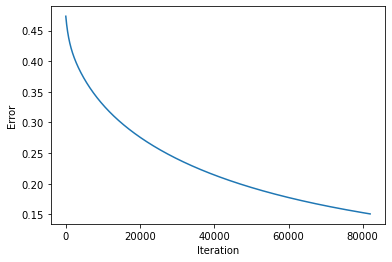

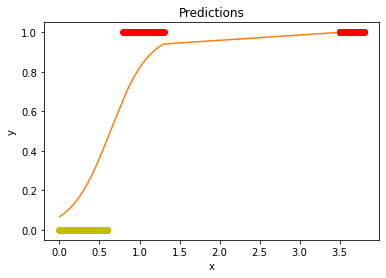

In [17]:
# Augment the data
_x = x[np.newaxis,:]
print(f"Shape of x: {_x.shape}")

x_aug = np.vstack((np.ones((1,_x.shape[1])), _x))
print(f"Shape of x_aug: {x_aug.shape}")

print(f"Shape of y: {y.shape}")

# Generate optimal weights using gradient descent
reg = logis_regression()
w_pred, err = reg.grad_descent(x_aug, y, 1e-3)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Plot the data and the optimal line
plt.plot(x, y, '.')
y_pred = reg.logis(x_aug,w_pred)
plt.plot(x,  y_pred)
pred_zero = np.where(y_pred < 0.5)
pred_one = np.where(y_pred >= 0.5)
plt.plot(x[pred_zero], np.zeros(x[pred_zero].shape[0]), 'oy')
plt.plot(x[pred_one], np.ones(x[pred_one].shape[0]), 'or')
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Classification of circularly separated data using logistic regression



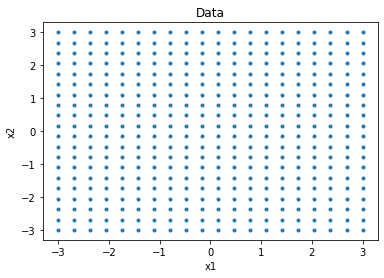

In [18]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(np.reshape(x11,(-1,1)),np.reshape(x22,(-1,1)),'.')
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

  Using the above data generate circular data

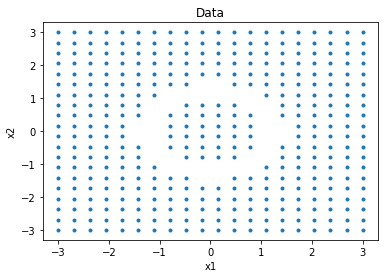

In [19]:
x = np.hstack((x11.reshape(-1,1),x22.reshape(-1,1)))
in_points = np.where((x[:,0]**2+x[:,1]**2)<=1)
out_points = np.where((x[:,0]**2+x[:,1]**2)>=2.1)
in_points = x[in_points]
out_points = x[out_points]
points = np.concatenate((in_points,out_points))

plt.plot(points[:,0],points[:,1],'.')
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

Shape of x: (3, 364)
Shape of y: (364,)
Optimal weights: [ 4.77630224 -3.28668146 -3.28679952]


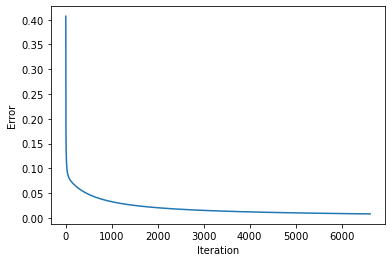

In [20]:
# perform logistic regression
reg = logis_regression()

x = np.hstack((np.ones((points.shape[0],1)),points**2)).T
print(f"Shape of x: {x.shape}")
y = np.concatenate((np.ones(in_points.shape[0]),np.zeros(out_points.shape[0])))
print(f"Shape of y: {y.shape}")

w_pred, err = reg.grad_descent(x, y, 1e-1)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

Plot classification using 0.5 as threshold

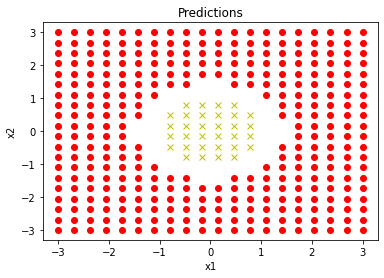

In [21]:
# Plot the classification using 0.5 threshold
y_pred = reg.logis(x,w_pred)
pred_zero = np.where(y_pred < 0.5)
pred_one = np.where(y_pred >= 0.5)
plt.plot(points[pred_zero,0], points[pred_zero,1], 'or')
plt.plot(points[pred_one,0], points[pred_one,1], 'xy')
plt.title('Predictions')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

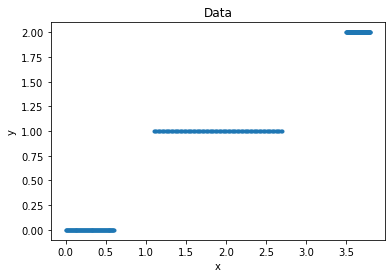

In [22]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [23]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)


In [24]:
# plot for classification
def plot_op(x,y_pred):

  ind0=np.where(y_pred<0.5)
  ind1=np.where(y_pred>=0.5)
  x0=x[ind0]
  x1=x[ind1]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  

Using the above function for plotting, plot the curve using different configurations

Optimal weights: [-5.76344227  1.8439777   4.72853547]


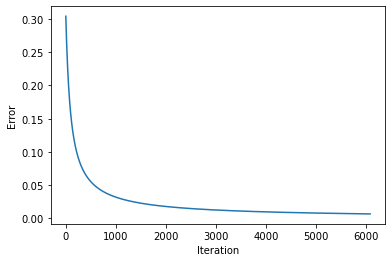

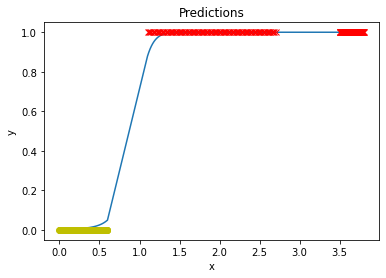

In [25]:
# take class 0 as '0' and other to '1'
zeros = np.where(y==0)
ones = np.where(y!=0)

ys = np.zeros(y.shape)
ys[ones] = 1

# perform logistic regression
reg = logis_regression()

w_pred, err = reg.grad_descent(x_aug, ys, 1e-1)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Plot the classification using 0.5 threshold
y_pred1 = reg.logis(x_aug,w_pred)
plt.plot(x,y_pred1)
plot_op(x,y_pred1)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Optimal weights: [  9.25100732 -14.44348674   3.68771526]


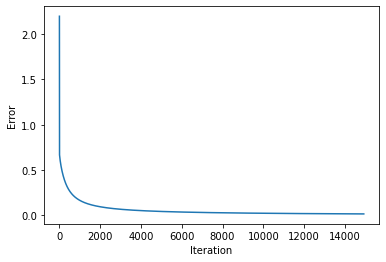

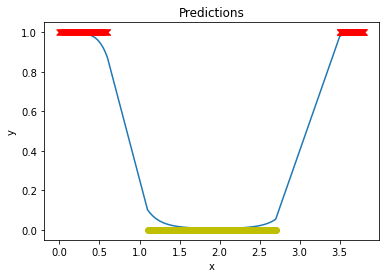

In [26]:
# take class 1 as '0' and other to '1'
zeros = np.where(y==1)
ones = np.where(y!=1)

ys = np.zeros(y.shape)
ys[ones] = 1

# perform logistic regression
reg = logis_regression()

w_pred, err = reg.grad_descent(x_aug, ys, 1e-1)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Plot the classification using 0.5 threshold
y_pred2 = reg.logis(x_aug,w_pred)
plt.plot(x,y_pred2)
plot_op(x,y_pred2)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Optimal weights: [ 5.58158324  4.25724647 -2.0110733 ]


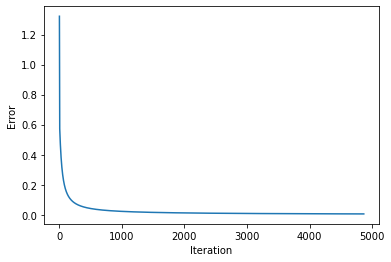

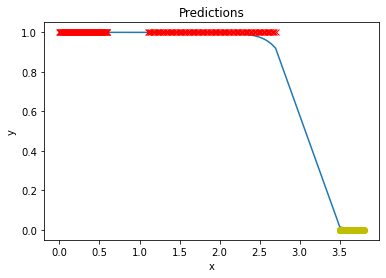

In [27]:
# Take class 2 as '0' and other to '1'
zeros = np.where(y==2)
ones = np.where(y!=2)

ys = np.zeros(y.shape)
ys[ones] = 1

# perform logistic regression
reg = logis_regression()

w_pred, err = reg.grad_descent(x_aug, ys, 1e-1)
print(f"Optimal weights: {w_pred}")

# Plot the error
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Plot the classification using 0.5 threshold
y_pred3 = reg.logis(x_aug,w_pred)
plt.plot(x,y_pred3)
plot_op(x,y_pred3)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

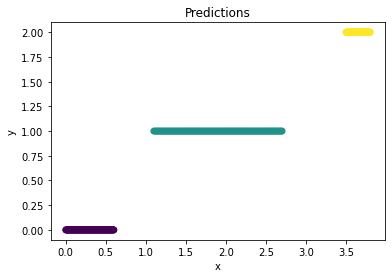

In [47]:
lables = []
for i, _ in enumerate(x):
  label = np.argmin([y_pred1[i], y_pred2[i], y_pred3[i]])
  lables.append(label)

plt.scatter(x, lables, c=lables)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()